In [2]:
import numpy as np
import matplotlib.pyplot as plt

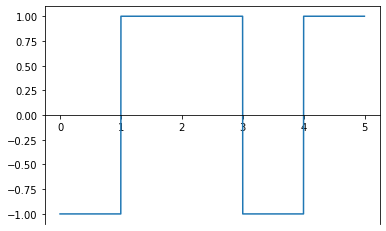

In [25]:
x_I = np.array([-1,1,1,-1,1])

N_samples_sec = 400 #Sample Frequency
t_sample = 1/N_samples_sec # 
t = np.arange(0, len(x_I), t_sample) # Time array
L_t = len(t) # Length of time array

Ts = 1

shaped_pulse = np.repeat(x_I,N_samples_sec*Ts)


p = np.zeros(L_t)
p[:N_samples_sec] = 1

p_reversed = np.copy(p)
p_reversed = p_reversed[::-1]

plt.plot(t,shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

Sent from transmitter:


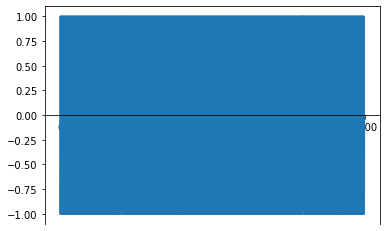

Received at receiver (noise added):


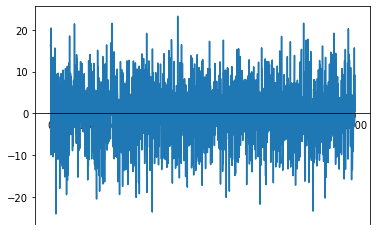

Input to match filter:


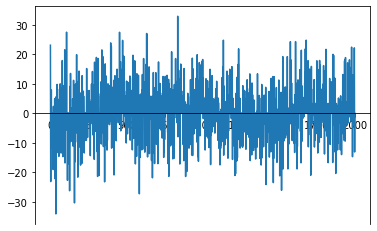

Output of match filter:


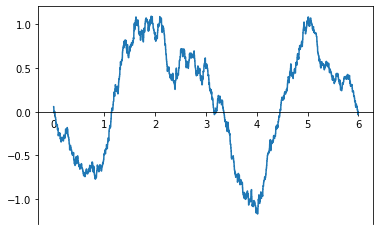


Slicer output
-1
1
1
-1
1


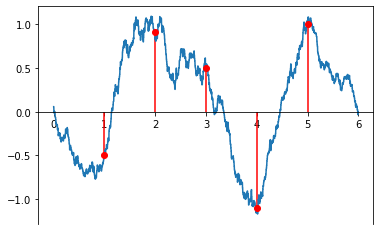

In [26]:
def slicer(num):
    if (num < 0 and num > -2):
        return -1
    elif (num <= -2):
        return -3
    elif (num > 0 and num < 2):
        return 1
    elif (num >= 2):
        return 3

f_c = 100


# Modulate at transmitter
i = 0

for val in shaped_pulse:
    shaped_pulse[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    i = i+1

print("Sent from transmitter:")
plt.plot(shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

# Add noise to channel
Ep = 1
EpNo_dB = 6
EpNo = 10 ** (EpNo_dB / 10)
No = 1 / EpNo # since Ep=1 is used

sigma = np.sqrt(No * N_samples_sec / 2)

noise = np.random.normal(0, sigma, L_t)
shaped_pulse = shaped_pulse + noise


print("Received at receiver (noise added):")
plt.plot(shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Modulate at receiver
i = 0

for val in shaped_pulse:
    shaped_pulse[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    i = i+1

print("Input to match filter:")
plt.plot(shaped_pulse)
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Matched Filter
MF_output = np.convolve(shaped_pulse,p_reversed) / N_samples_sec
MF_output = np.trim_zeros(MF_output)

new_t = np.arange(0, len(x_I)+1, t_sample) # Time array for match filter output

print("Output of match filter:")
plt.plot(new_t[:-1],MF_output)
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Sample matched filter output and run through slicer
print("")
print("Slicer output")


plt.plot(new_t[:-1],MF_output)
plt.gca().spines['bottom'].set_position('zero')

for i in range(len(x_I)):
    num = MF_output[(i+1)*N_samples_sec - 1]
    x_I_hat = slicer(num)
    
    plt.stem([i+1],[num],'red',markerfmt='ro')
    print(x_I_hat)
    
plt.show()

I:


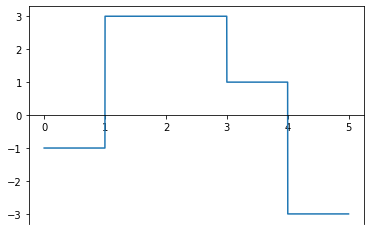

Q:


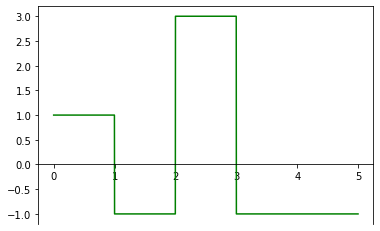

In [62]:
x_I = np.array([-1,3,3,1,-3])
x_Q = np.array([1,-1,3,-1,-1])

N_samples_sec = 400 #Sample Frequency
t_sample = 1/N_samples_sec # 
t = np.arange(0, len(x_I), t_sample) # Time array
L_t = len(t) # Length of time array


# Nyquist Pulse Shaping: p(t) = rect
Ts = 1

shaped_pulse_I = np.repeat(x_I,N_samples_sec*Ts)
shaped_pulse_Q = np.repeat(x_Q,N_samples_sec*Ts)


#Calculate p(-t)
p = np.zeros(L_t)
p[:N_samples_sec] = 1

p_reversed = np.copy(p)
p_reversed = p_reversed[::-1]


#Plot shaped pulses
print("I:")
plt.plot(t,shaped_pulse_I)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

print("Q:")
plt.plot(t,shaped_pulse_Q,'g')
plt.gca().spines['bottom'].set_position('zero')
plt.show()

Modulated In-Phase Signal:


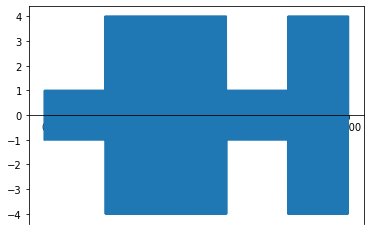

Modulated Quadrature Signal:


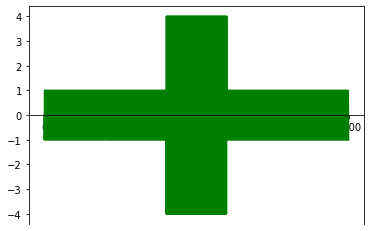

Transmitted Signal:


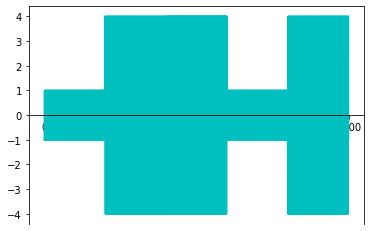

Received Signal:


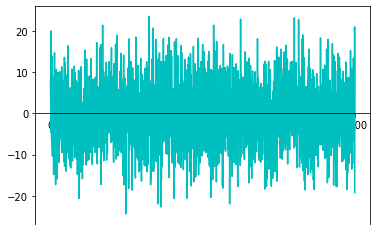

Modulated Signal In-Phase Component:


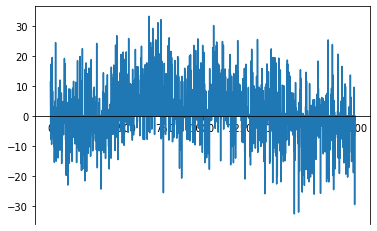

Modulated Signal Quadrature Component:


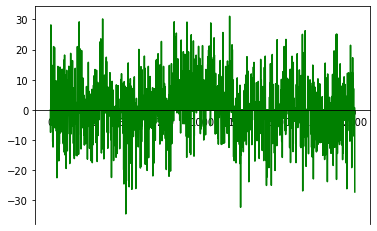

x_I_hat:

-1
3
3
1
-3


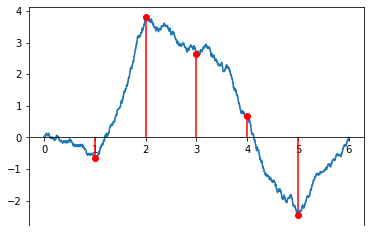

x_Q_hat:

1
-1
3
-1
-1


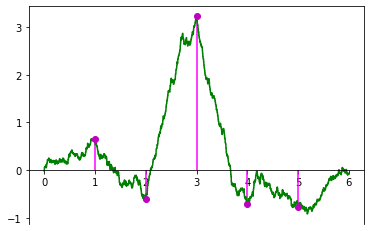

In [63]:
def slicer(num):
    if (num < 0 and num >= -2):
        return -1
    elif (num < -2):
        return -3
    elif (num >= 0 and num <= 2):
        return 1
    elif (num > 2):
        return 3

f_c = 100


# Modulate at transmitter
# In-Phase Component
i = 0

for val in shaped_pulse_I:
    shaped_pulse_I[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    i = i+1


print("Modulated In-Phase Signal:")
plt.plot(shaped_pulse_I)
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Quadrature Component
i = 0

for val in shaped_pulse_Q:
    shaped_pulse_Q[i] = -val*np.sqrt(2)*np.sin(2*np.pi*f_c*i/N_samples_sec)
    i = i+1

    
print("Modulated Quadrature Signal:")
plt.plot(shaped_pulse_Q,'g')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Sum the in-phase and quadrature signals
r = shaped_pulse_I + shaped_pulse_Q

print("Transmitted Signal:")
plt.plot(r,'c')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Add noise to channel
Ep = 1
EpNo_dB = 6
EpNo = 10 ** (EpNo_dB / 10)
No = 1 / EpNo # since Ep=1 is used

sigma = np.sqrt(No * N_samples_sec / 2)

noise = np.random.normal(0, sigma, L_t)
r = r + noise

print("Received Signal:")
plt.plot(r,'c')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Modulate at receiver
MF_input_I = np.zeros(len(r))
MF_input_Q = np.zeros(len(r))

i = 0

for val in r:
    MF_input_I[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    MF_input_Q[i] = -val*np.sqrt(2)*np.sin(2*np.pi*f_c*i/N_samples_sec)
    
    i = i+1

print("Modulated Signal In-Phase Component:")
plt.plot(MF_input_I)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

print("Modulated Signal Quadrature Component:")
plt.plot(MF_input_Q,'g')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


new_t = np.arange(0, len(x_I)+1, t_sample) # Time array for match filter output


# Pass through pulse matched filter (PMF)
MF_output_I = np.convolve(MF_input_I,p_reversed) / N_samples_sec
MF_output_I = np.trim_zeros(MF_output_I)

MF_output_Q = np.convolve(MF_input_Q,p_reversed) / N_samples_sec
MF_output_Q = np.trim_zeros(MF_output_Q)


# Pass through slicer
slicer_I = np.zeros(len(x_I))
slicer_Q = np.zeros(len(x_Q))


# In-Phase Component
plt.plot(new_t[:-1],MF_output_I)
plt.gca().spines['bottom'].set_position('zero')

print("x_I_hat:")
print("")

for i in range(len(x_I)):
    num = MF_output_I[(i+1)*N_samples_sec - 1]
    x_I_hat = slicer(num)
    
    slicer_I[i] = x_I_hat
    print(x_I_hat)
    
    plt.stem([i+1],[num],'red',markerfmt='ro')

plt.show()


# Quadrature Component
plt.plot(new_t[:-2],MF_output_Q,'g')
plt.gca().spines['bottom'].set_position('zero')

print("x_Q_hat:")
print("")

for i in range(len(x_Q)):
    num = MF_output_Q[(i+1)*N_samples_sec - 1]
    x_Q_hat = slicer(num)
    
    slicer_Q[i] = x_Q_hat
    print(x_Q_hat)
    
    plt.stem([i+1],[num],'magenta',markerfmt='mo')

plt.show()